## 2. Nonlinear Optimization

In [6]:
using PyPlot
using Formatting
using Random
using LinearAlgebra
using Printf
using ForwardDiff

Random.seed!(1234);

In [54]:
function f_obs(x)
    return 1/2*x[1]^4-2*x[1]^2*x[2]+4*x[2]^2+8*x[1]+8x[2]
end

f_obs (generic function with 1 method)

In [71]:
function line_search(x, grad_f, d, rho, c1, alpha0)
   
    # step 0
    alpha = alpha0
    
    while true
        
        # step 1
        l = f_obs(x + alpha .* d)
        if l <= f_obs(x) + c1 * dot(grad_f, d) * alpha
            return alpha
        end

        # step 2
        alpha = rho * alpha        

    end 
end

line_search (generic function with 2 methods)

### Example 2.5 Gradient descent method

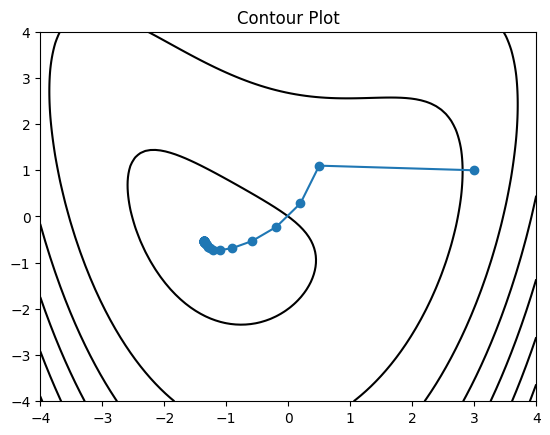

[-50.0, 2.0]
Solution: [-1.36465, -0.534431]


In [81]:
# 評価関数とその勾配
f(x::Vector) = f_obs(x)
g = x -> ForwardDiff.gradient(f, x)

# 初期解の設定
x0 = [3, 1]
#println(-g(x0)) # 初期解x0における探索方向

# 最適解の計算
loop_num = 50
alpha0 = 0.05
c1 = 0.01
rho = 0.01
x_history = x0
alpha_history = [alpha0]
xn = x0
for i in 1:loop_num
   
    dn = -g(xn)                                         # 勾配を計算
    alpha = line_search(xn, g(xn), dn, rho, c1, alpha0) # 直線探索
    xn = xn + alpha .* dn                               # 更新
    
    x_history = hcat(x_history, xn)
    append!(alpha_history, alpha)
end

print("Solution: ")
println(xn)

# 最適化する関数のコンター図の準備
n=100
x1 = range(-4, stop=4, length=n)
x2 = range(-4, stop=4, length=n)
x1grid = repeat(x1', n, 1)
x2grid = repeat(x2, 1, n)

z = zeros(n, n)
for i in 1:n
    for j in 1:n
        z[i, j] = f_obs([x1[j], x2[i]])
    end
end

# 解の点列の準備
x1_scatter = x_history[1, :]
x2_scatter = x_history[2, :]

# 解の軌跡の準備
lines = Any[collect(zip(x1_scatter, x2_scatter))]
line_segments = matplotlib.collections.LineCollection(lines)

# 全部プロット
PyPlot.contour(x1grid, x2grid, z, colors="black", linewidth=1.0)
PyPlot.scatter(x1_scatter, x2_scatter)
ax = PyPlot.axes()
ax.add_collection(line_segments)
PyPlot.title("Contour Plot")
PyPlot.show()

### Example 2.6 Newton method

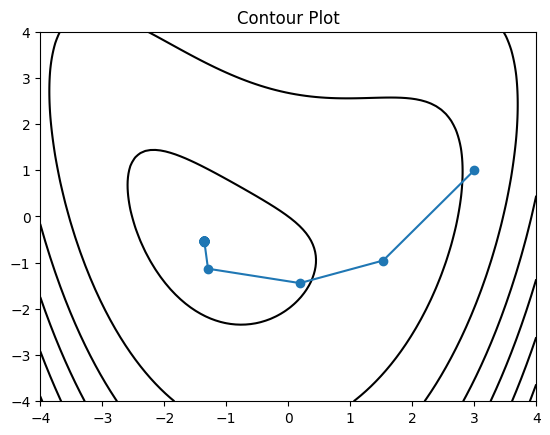

Solution: [-1.36466, -0.534429]


In [84]:
# 評価関数とその勾配
f(x::Vector) = f_obs(x)
g = x -> ForwardDiff.gradient(f, x)
h = x -> ForwardDiff.hessian(f, x)

# 初期解の設定
x0 = [3, 1]

# 最適解の計算
loop_num = 50
alpha = 1.0
x_history = x0
xn = x0
for i in 1:loop_num
       
    dn = h(xn) \ (-g(xn))  # 勾配を計算 
    xn = xn + alpha .* dn  # 更新
    
    x_history = hcat(x_history, xn)
end

print("Solution: ")
println(xn)

# 最適化する関数のコンター図の準備
n=100
x1 = range(-4, stop=4, length=n)
x2 = range(-4, stop=4, length=n)
x1grid = repeat(x1', n, 1)
x2grid = repeat(x2, 1, n)

z = zeros(n, n)
for i in 1:n
    for j in 1:n
        z[i, j] = f_obs([x1[j], x2[i]])
    end
end

# 解の点列の準備
x1_scatter = x_history[1, :]
x2_scatter = x_history[2, :]

# 解の軌跡の準備
lines = Any[collect(zip(x1_scatter, x2_scatter))]
line_segments = matplotlib.collections.LineCollection(lines)

# 全部プロット
PyPlot.contour(x1grid, x2grid, z, colors="black", linewidth=1.0)
PyPlot.scatter(x1_scatter, x2_scatter)
ax = PyPlot.axes()
ax.add_collection(line_segments)
PyPlot.title("Contour Plot")
PyPlot.show()

### Example 2.7 Quasi-Newton method